In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import os 
import csv

In [2]:

BOOKS_PATH = os.path.join('Books_rating.csv')
SPORT_PATH = os.path.join('EAsports_FC24_Steam_Reviews.csv')
MOVIE_PATH = os.path.join('IMDB Dataset.csv')

In [3]:
df_sport = pd.read_csv(SPORT_PATH)
sport_data = df_sport.drop(['author_last_played', 'created'], axis=1)
sport_data.head()



,id,language,review,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review
0,157328534,english,absolute garbage,False,0,0,True,False,False,0,1,617,30,587
1,157326188,english,9 out of 10 games of pvp will matchmake you ag...,False,1,0,True,False,False,266,19,2960,2960,2857
2,157325082,english,terrible game\n,False,0,0,True,False,False,84,3,8533,2790,8451
3,157324209,english,h,True,0,0,True,False,False,0,1,1199,1199,1199
4,157324180,english,I personally haven't experienced any major bug...,True,0,0,True,False,False,0,1,965,965,965


In [4]:
print("Missing values distribution")
print(sport_data.isnull().mean())
print("")

Missing values distribution
id                                0.000000
language                          0.000000
review                            0.003881
voted_up                          0.000000
votes_up                          0.000000
comment_count                     0.000000
steam_purchase                    0.000000
recieved_for_free                 0.000000
written_during_early_access       0.000000
author_num_games_owned            0.000000
author_num_reviews                0.000000
author_playtime_forever           0.000000
author_playtime_last_two_weeks    0.000000
author_playtime_at_review         0.000000
dtype: float64



In [5]:
print("Column datatypes: ")
print(sport_data.dtypes)

Column datatypes: 
id                                 int64
language                          object
review                            object
voted_up                            bool
votes_up                           int64
comment_count                      int64
steam_purchase                      bool
recieved_for_free                   bool
written_during_early_access         bool
author_num_games_owned             int64
author_num_reviews                 int64
author_playtime_forever            int64
author_playtime_last_two_weeks     int64
author_playtime_at_review          int64
dtype: object


In [6]:
df_movie = pd.read_csv(MOVIE_PATH)
df_movie.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
def clean_data(text):
    return re.sub(r"<br\s*/?>", " ", text)


df_movie['review'] = df_movie['review'].apply(clean_data)

In [8]:
df_books = pd.read_csv(BOOKS_PATH)
df_books.head()
initial_length = len(df_books)
initial_length



3000000

In [9]:
print("Missing values distribution")
print(df_books.isnull().mean())
print("")

Missing values distribution
Id                    0.000000
Title                 0.000069
Price                 0.839610
User_id               0.187262
profileName           0.187295
review/helpfulness    0.000000
review/score          0.000000
review/time           0.000000
review/summary        0.000013
review/text           0.000003
dtype: float64



In [10]:
df_books.dropna(subset=['Price', 'User_id', 'profileName', 'review/summary', 'review/text', 'Title'], inplace=True)
df_books.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,1/1,5.0,1291766400,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",1/1,5.0,1248307200,Not Just for Pastors!,I just finished reading this amazing book and ...
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,Maxwell Grant,1/1,5.0,1222560000,Small church pastor? This is the book on worship,I hadn't been a small church pastor very long ...
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...


In [11]:
print(f"Number of rows deleted {initial_length - len(df_books)}")

Number of rows deleted 2585452


In [12]:
print("Missing values distribution")
print(df_books.isnull().mean())
print("")

Missing values distribution
Id                    0.0
Title                 0.0
Price                 0.0
User_id               0.0
profileName           0.0
review/helpfulness    0.0
review/score          0.0
review/time           0.0
review/summary        0.0
review/text           0.0
dtype: float64



In [16]:
print(len(df_books))

414548


In [17]:
# Create a unified dataframe
data = []
df_sport = df_sport[:5000]
df_movie = df_movie[:5000]
df_books = df_books[:5000]


# Add sports reviews
for index, row in df_sport.iterrows():
    data.append({'text': row['review'], 'sentiment': 'unknown', 'topic': 'sports'})

# Add movie reviews
for index, row in df_movie.iterrows():
    data.append({'text': row['review'], 'sentiment': row['sentiment'], 'topic': 'movie'})

# Add book reviews
for index, row in df_books.iterrows():
    data.append({'text': row['review/text'], 'sentiment': 'unknown', 'topic': 'book'})

# Convert to a DataFrame
final_df = pd.DataFrame(data)

# If you have or need sentence IDs
final_df = final_df.reset_index().rename(columns={'index': 'sentence id'})

# Show the dataframe
print(final_df.head())

   sentence id                                               text sentiment  \
0            0                                   absolute garbage   unknown   
1            1  9 out of 10 games of pvp will matchmake you ag...   unknown   
2            2                                    terrible game\n   unknown   
3            3                                                  h   unknown   
4            4  I personally haven't experienced any major bug...   unknown   

    topic  
0  sports  
1  sports  
2  sports  
3  sports  
4  sports  


In [18]:
topic_df = final_df[['text','topic']]
topic_df

,text,topic
0,absolute garbage,sports
1,9 out of 10 games of pvp will matchmake you ag...,sports
2,terrible game\n,sports
3,h,sports
4,I personally haven't experienced any major bug...,sports
...,...,...
14995,If you're not seeking religious advice for you...,book
14996,I ordered THE ANGER WORKBOOK because I had bec...,book
14997,The Anger Workbook is an excellent tool to use...,book
14998,"This book is confusing to me. For example, I e...",book


In [19]:
test_df = pd.read_csv('sentiment-topic-test (1).tsv', delimiter='\t')


test_df = test_df.drop('sentence id', axis=1)

test_df = test_df[['text', 'sentiment', 'topic']]
test_df.rename(columns={'text': "Text", 'sentiment':'Sentiment', 'topic': 'Topic'}, inplace=True)
test_df.head()

,Text,Sentiment,Topic
0,I wouldn't be caught dead watching the NFL if ...,negative,sports
1,Chris O'Donnell stated that while filming for ...,neutral,movie
2,"The whole game was a rollercoaster ride, but L...",positive,sports
3,"Zendaya slayed in Dune 2, as she does in all h...",positive,movie
4,While my favorite player was playing this matc...,negative,sports


In [20]:
test_df_topic =test_df[['Text','Topic']]

In [21]:
test_df_topic

,Text,Topic
0,I wouldn't be caught dead watching the NFL if ...,sports
1,Chris O'Donnell stated that while filming for ...,movie
2,"The whole game was a rollercoaster ride, but L...",sports
3,"Zendaya slayed in Dune 2, as she does in all h...",movie
4,While my favorite player was playing this matc...,sports
5,My uncle's brother's neighbor's cat's veterina...,book
6,He said that The Great Gatsby is the best nove...,book
7,I could not look away from this train wrck of ...,movie
8,The film Everything Everywhere All At Once fol...,movie
9,I just finished reading pride and prejudice wh...,book


In [22]:
# Ensure the DataFrame is correctly referenced if needed
train_df = topic_df.rename(columns={"text": "Text", "topic": "Topic"})
test_df = test_df_topic  # Assuming test_df_topic is already correctly formatted


In [24]:
# Replace NaN values with an empty string
train_df['Text'] = train_df['Text'].fillna('')

# Now proceed with vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_df['Text'])
y_train = train_df['Topic']


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
# Perform 5-fold cross-validation and print the accuracy scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy scores for each fold:", scores)


Accuracy scores for each fold: [0.98133333 0.97233333 0.98366667 0.96866667 0.98366667]


In [26]:
# Train on full training data
model.fit(X_train, y_train)

# Vectorize the test data
X_test = vectorizer.transform(test_df['Text'])
y_test = test_df['Topic']

# Predict on test data
predictions = model.predict(X_test)


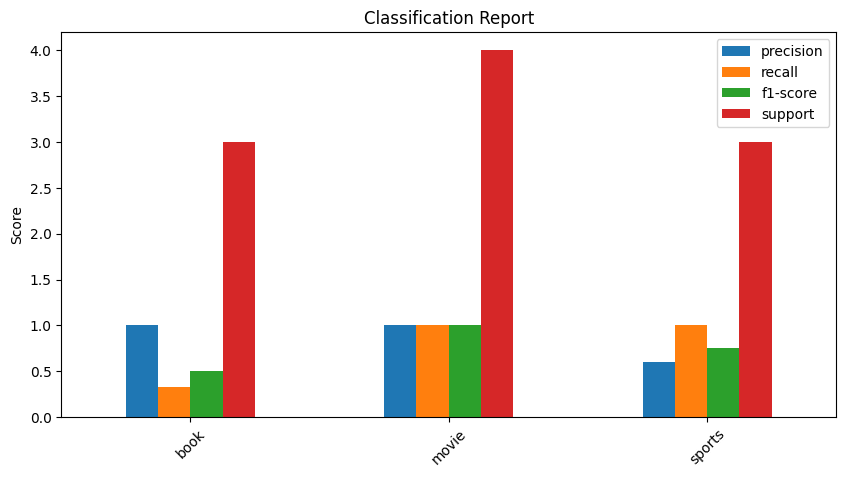

In [27]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a classification report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df[:-3].plot(kind='bar', figsize=(10, 5))  # Exclude the last 3 rows (avg/total rows)
plt.title('Classification Report')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Replace NaN values with an empty string (if not already done)
topic_df['text'] = topic_df['text'].fillna('')

# Initialize a CountVectorizer to create a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(topic_df['text'])


/var/folders/gv/kvbk556j5l3dcb84mlpy_n280000gn/T/ipykernel_31715/1083506188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_df['text'] = topic_df['text'].fillna('')


In [29]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA with desired number of topics
n_topics = 3  # Adjust based on your data or desired granularity
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit LDA to the document-term matrix
lda.fit(X)


LatentDirichletAllocation(n_components=3, random_state=42)

In [30]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
movie film like just game good time really bad don
Topic 1:
book story life world people history time new great read
Topic 2:
book read quot like just good books great really reading


In [31]:

# Replace NaN values with an empty string
test_df['Text'] = test_df['Text'].fillna('')

# Transform the text data using the previously fitted CountVectorizer
X_test = vectorizer.transform(test_df['Text'])


In [32]:
# Apply the LDA model to the test set
test_topic_distributions = lda.transform(X_test)


In [33]:
# Display the topic distribution for the first document in the test set
print("Topic distribution for the first document in the test set:")
print(test_topic_distributions[0])

# Find the most dominant topic for the first document
dominant_topic = test_topic_distributions[0].argmax()
print(f"The most dominant topic for the first document is: Topic {dominant_topic}")


Topic distribution for the first document in the test set:
[0.85593987 0.07392815 0.07013199]
The most dominant topic for the first document is: Topic 0


In [34]:
import numpy as np

# Calculate the most dominant topic for each document
dominant_topics = np.argmax(test_topic_distributions, axis=1)

# Count how many documents belong to each topic
unique, counts = np.unique(dominant_topics, return_counts=True)
topic_counts = dict(zip(unique, counts))

print("Topic counts across the test set documents:")
for topic, count in topic_counts.items():
    print(f"Topic {topic}: {count} documents")


Topic counts across the test set documents:
Topic 0: 6 documents
Topic 1: 2 documents
Topic 2: 2 documents


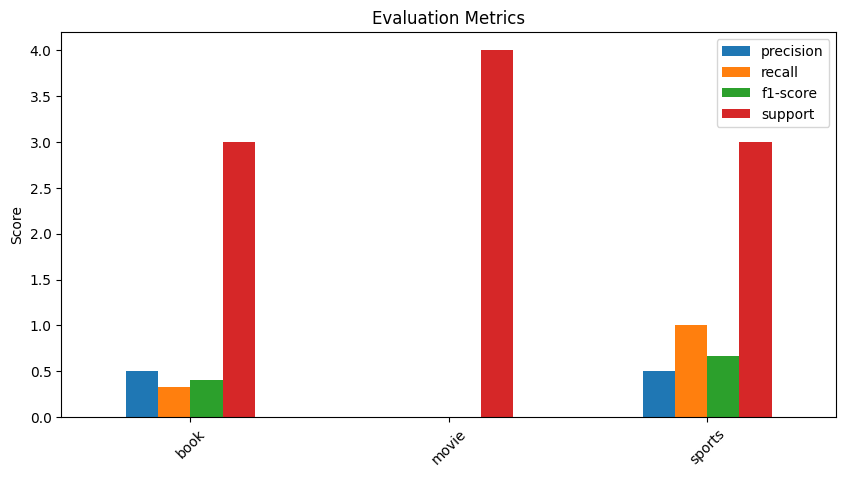

In [35]:
from sklearn.metrics import classification_report
import numpy as np

# Example: Manual mapping of topics to your known labels
# This is highly dependent on your analysis of the topics
topic_label_mapping = {0: 'sports', 1: 'book', 2: 'movie'}

# Map dominant topics to labels
predicted_labels = [topic_label_mapping[topic] for topic in dominant_topics]

# Calculate precision, recall, F1-score
report = classification_report(test_df['Topic'], predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting
report_df[:-3].plot(kind='bar', figsize=(10, 5))  # Exclude the last 3 rows (avg/total rows)
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()
